Dataset: https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset

Integrantes: Maximiliano Romano

El dataset elegido es sobre predicción de accidentes cerebrovasculares


---


Preguntas:

Predecir presencia de stroke


¿Cuales son las variables con mas relacion con los accidentes cerebrovasculares (stroke)?


¿Cual modelo de entrenamiento se ajusta mejor al dataset?


¿Existe relacion entre el bmi y la edad?


¿Las personas fumadoras tiene mas riesgo de tener un infarto?

*Variables:*


---


 **Gender**: "Hombre", "Mujer" u "Otro".

 **Age**: Edad del paciente.

 **Hypertension**:  0 si el paciente no tiene hipertensión, 1 si tiene hipertensión.

 **heart_disease**: 0 si el paciente no tiene ninguna, 1 si tiene una enfermedad cardiaca.

 **ever_married**: Alguna vez casado: "No" o "Sí".

 **work_type**: "niños", "Nunca trabajó", "Privado" o "Autónomo".

 **Residence_type**: "Rural" o "Urbano".

 **avg_glucose_level**: Nivel medio de glucosa en sangre.

 **bmi**: Indice de masa corporal.

 **smoking_status**: "antes fumaba", "nunca ha fumado", "fuma" o "desconocido"

  **stroke**: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no lo tuvo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import pandas_profiling

In [2]:
df = pd.read_csv('C:/Users/Maxi/Notebooks/Entregas/full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.shape

(4981, 11)

In [4]:
df.count()                  #total de datos por columna

gender               4981
age                  4981
hypertension         4981
heart_disease        4981
ever_married         4981
work_type            4981
Residence_type       4981
avg_glucose_level    4981
bmi                  4981
smoking_status       4981
stroke               4981
dtype: int64

In [5]:
df.dtypes                      #Tipos de variables

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.isna().sum()                #datos ausentes

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.duplicated().sum()        #datos duplicados

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [9]:
print(df['gender'].unique())                       #ver los valores en esas columnas
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['ever_married'].unique())

['Male' 'Female']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


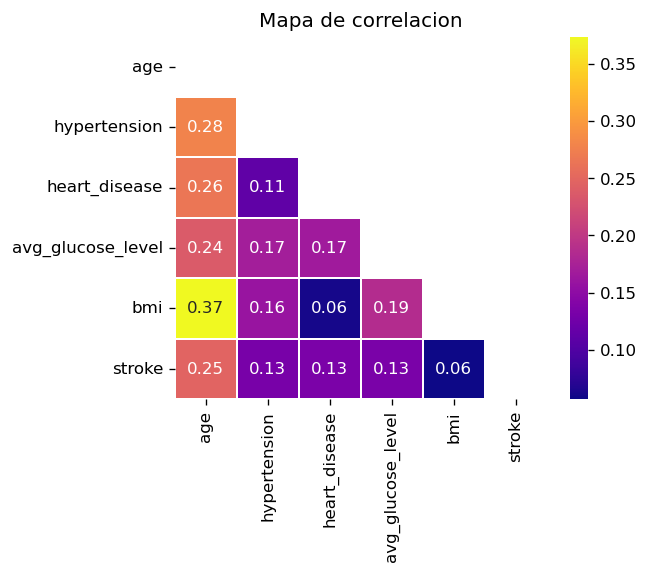

In [10]:
plt.figure(dpi = 120,figsize= (5,4))                                        #Grafico de correlacion
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de correlacion')
plt.show()

Text(0.5, 1.0, 'Cantidad de personas por genero')

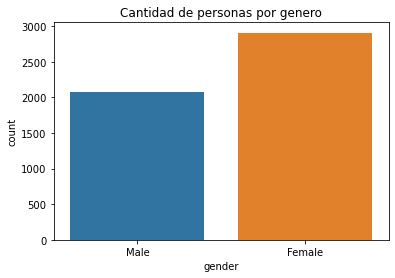

In [11]:
sns.countplot(df.iloc[:,0])
plt.title('Cantidad de personas por genero')

Hay muchas mas mujeres que hombres

Text(0.5, 1.0, 'Relacion Genero, bmi, infarto')

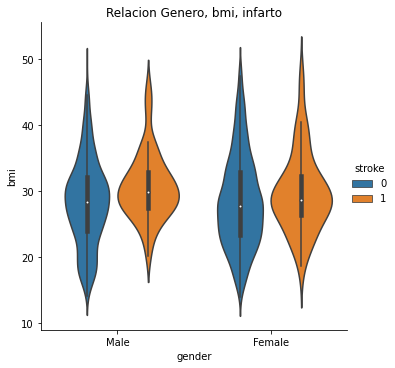

In [12]:
sns.catplot(x="gender", y="bmi", hue = 'stroke', kind="violin", data=df)
plt.title('Relacion Genero, bmi, infarto')

Como se ve en el grafico no hay relacion entre el genero de la persona y la probabilidad de infarto.

Y tambien se puede ver que el bmi en mujeres no infartadas es un poco mas alto

# Relacion Edad, bmi e infarto

Text(0.5, 1.0, 'Edades')

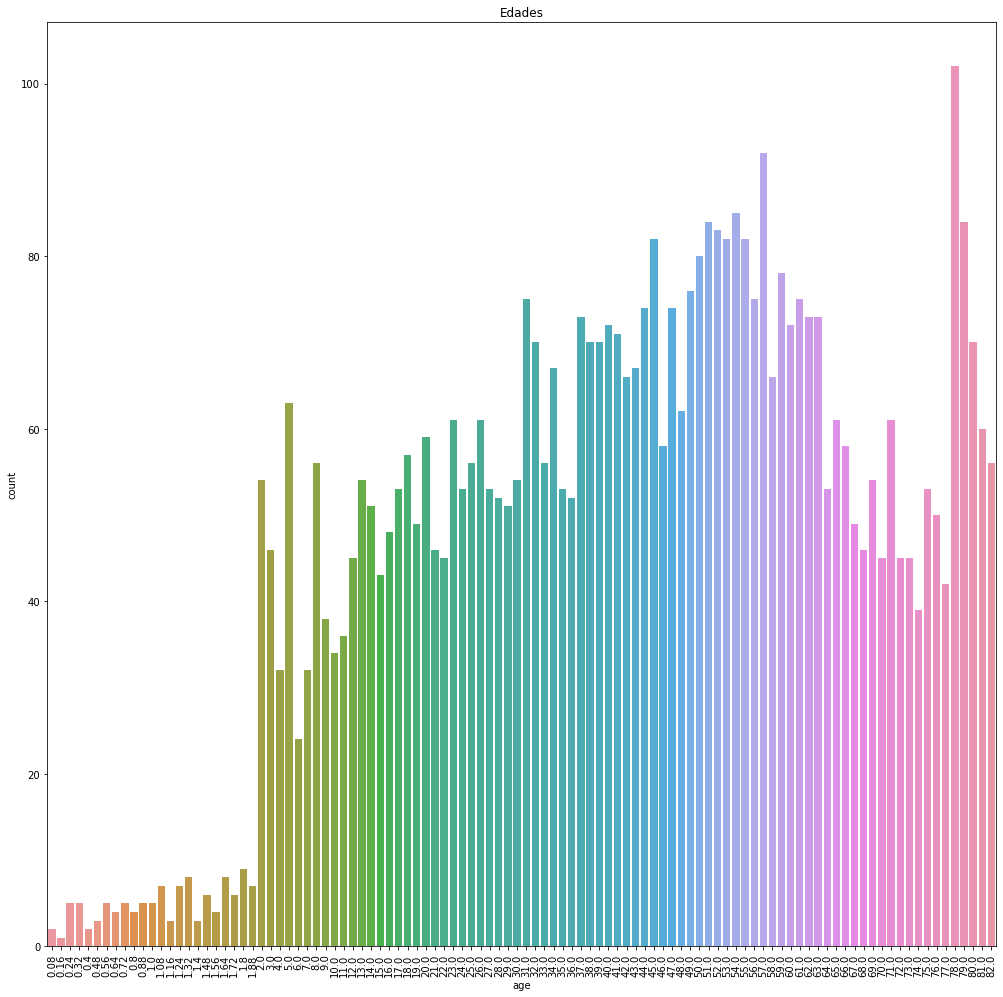

In [13]:
plt.figure(figsize=(17,17))
sns.countplot(df.iloc[:,1])
plt.xticks(rotation = 90)
plt.title('Edades')

La mayor cantidad de datos se encuentra entre los 3 y los 82 años

Text(0.5, 1.0, 'Relacion Edad y Bmi')

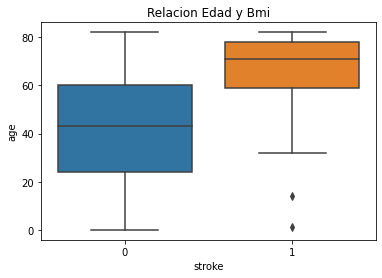

In [14]:
sns.boxplot(x="stroke", y="age",data=df)
plt.title('Relacion Edad y Bmi')

Los infartos se concentran entre las personas de 60 y 80 años (Mucha relacion con la edad)

Se pueden ver valores atipicos en la columna de infarto a los 0 y 20 años

Text(0.5, 1.0, 'Relacion Edad y Bmi')

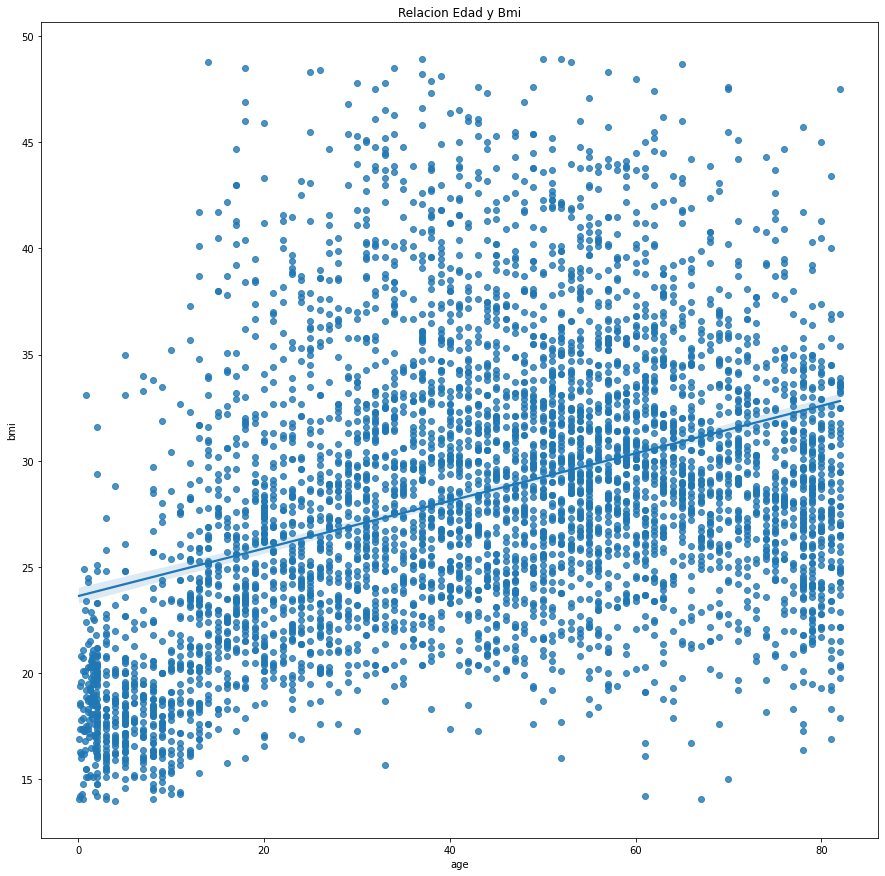

In [15]:
plt.figure(figsize=(15,15))
sns.regplot(x="age", y="bmi",data=df)
plt.title('Relacion Edad y Bmi')

Se puede ver una relacion creciente entre edad y bmi

A medida que crece la edad tambien sube el Bmi

Text(0.5, 1.0, 'Relacion Edad y Bmi')

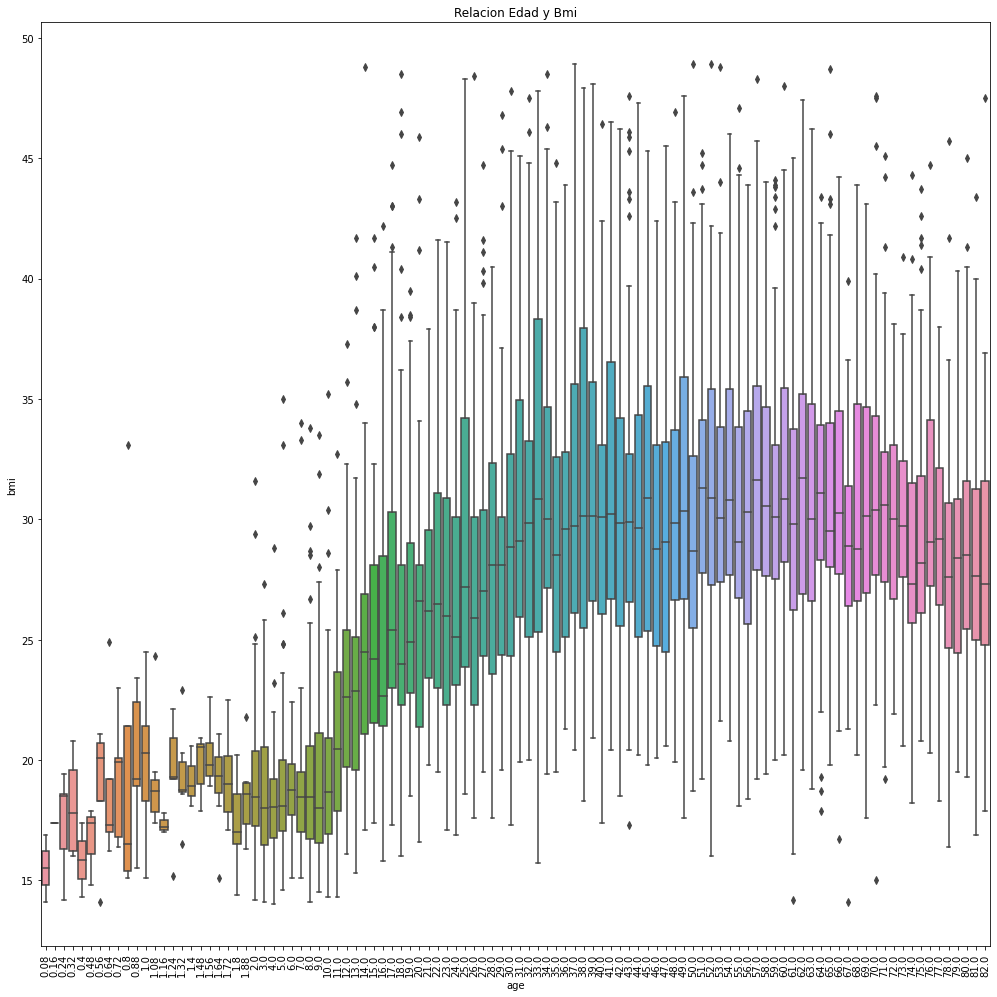

In [16]:
plt.figure(figsize=(17,17))
sns.boxplot(x="age", y="bmi",data=df)
plt.xticks(rotation = 90)
plt.title('Relacion Edad y Bmi')

En este grafico se ve como el bmi comienza manteniendose igual hasta los 12 años, luego de los 12 a los 30 se ve un crecimiento bastante pronunciado
hasta llegar al pico 31 que se mantiene hasta los 70 años y despues se ve una ligera bajada

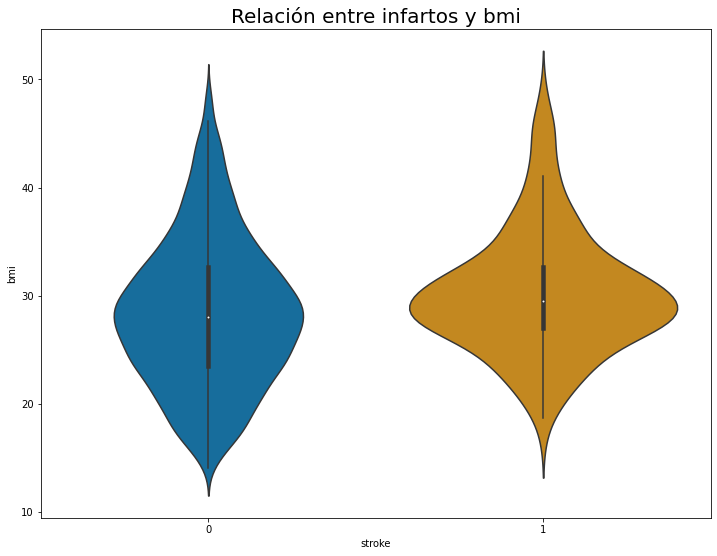

In [17]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df['stroke'], df['bmi'], palette = 'colorblind')
plt.title('Relación entre infartos y bmi', fontsize = 20, fontweight = 30)
plt.show()

Se ve que la mayoria de personas infartadas tenian bmi cercano a 30

In [18]:
df.bmi.mean()              #promedio de bmi

28.498173057619002

# Relacion hypertension y edad

<AxesSubplot:xlabel='hypertension', ylabel='age'>

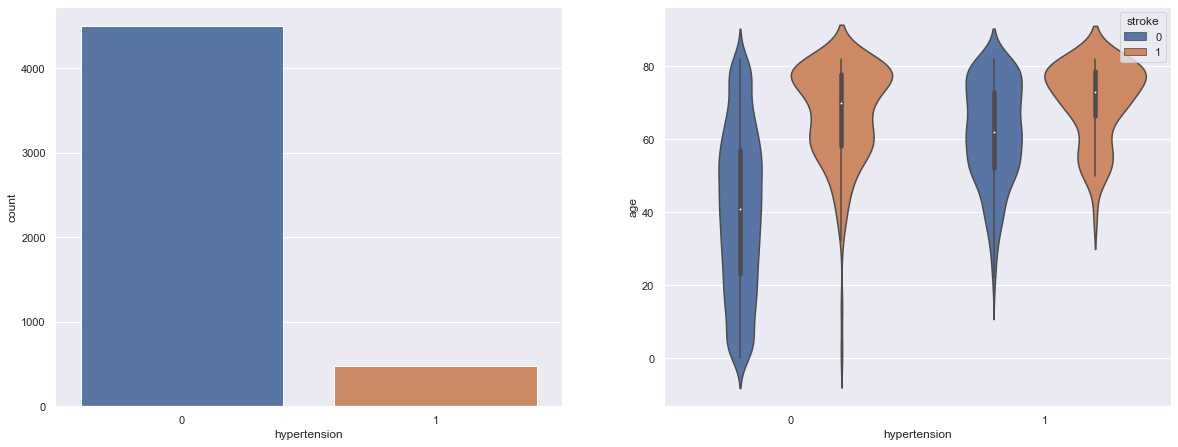

In [19]:
plt.figure(figsize = (20,25))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.countplot(df.iloc[:,2])

plt.subplot(3,2,2)
sns.violinplot(x = 'hypertension', y = 'age', hue= 'stroke', data = df)

Se ve como la gente con hipertension se encuentra entre los 40 y 80 

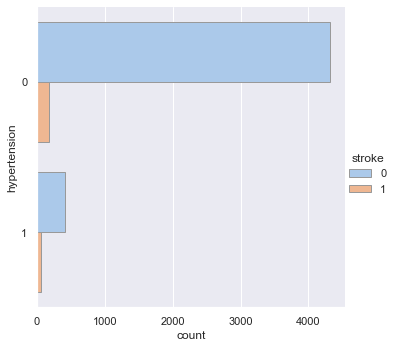

In [20]:
sns.catplot(y="hypertension", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

La proporcion de gente infartada con hipertension es mucho mas alta

# Relacion infartos con estado civil, tipo de trabajo, tipo de residencia y fumadores

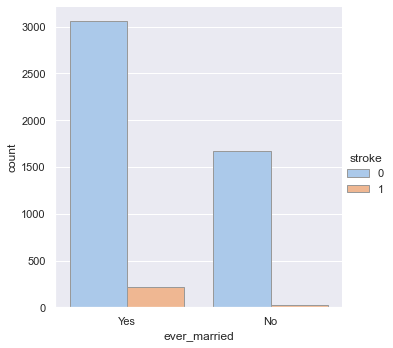

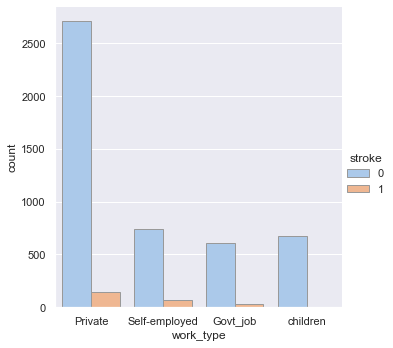

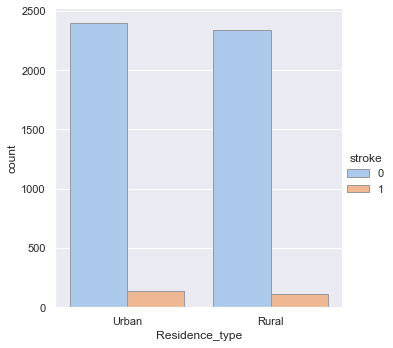

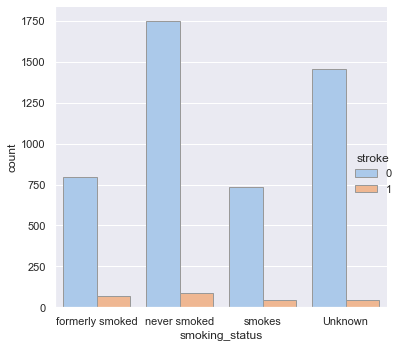

In [21]:
fig = plt.figure(figsize = (20,25))

ax1 = fig.add_subplot(3,2,1)
g = sns.catplot(x="ever_married", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

ax2 = fig.add_subplot(3,2,2)
g = sns.catplot(x="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

ax3 = fig.add_subplot(3,2,3)
g = sns.catplot(x="Residence_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

ax3 = fig.add_subplot(3,2,4)
g =sns.catplot(x="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

plt.close(0)
plt.close(1)
plt.tight_layout()

En el primer grafico y tercer grafico no se ve mucha relacion con el stroke.

En el segundo grafico se ve la columna de self-employed(
Trabajadores por cuenta propia) proporcionalmente mas alta que las demas.

En el cuarto grafico las columnas de formely smoked (Anteriormente fumada) y smokes (fuma) tienen alta relacion con stroke.

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

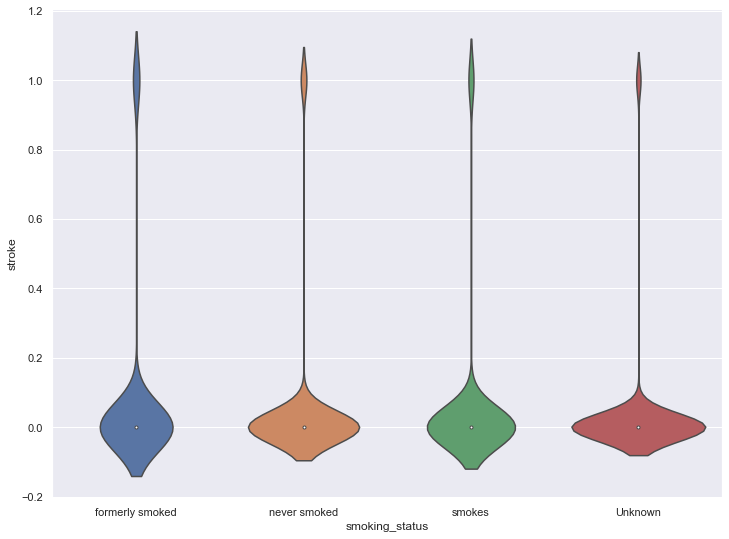

In [22]:
sns.violinplot(x = 'smoking_status', y = 'stroke', data = df)

En este grafico se ve mas claro como las columnas de formerly smoked y smokes son mas relevantes en los infartos

# Relacion nivel de glucosa con infartos

Text(0.5, 1.0, 'Relacion Nivel de glucosa con infartos')

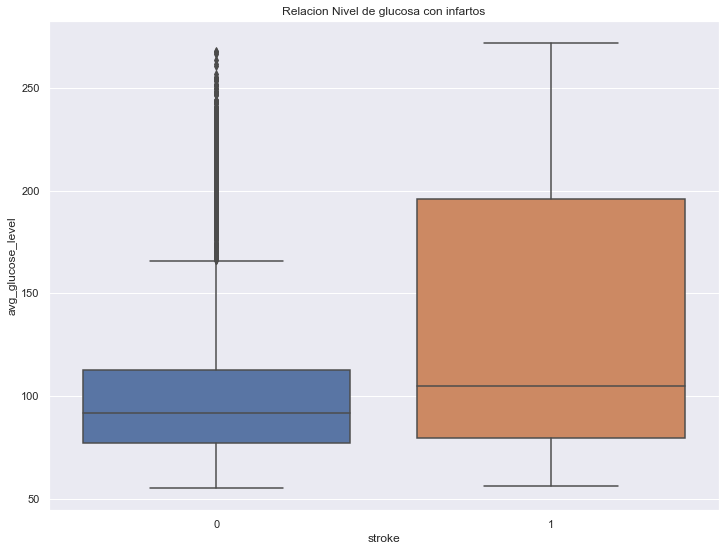

In [23]:
sns.boxplot(x="stroke", y="avg_glucose_level",data=df)
plt.title('Relacion Nivel de glucosa con infartos')

Se ve claramente como las personas con un alto nivel de glucosa tienen infartos

Text(0.5, 1.0, 'Relacion Nivel de glucosa y Bmi')

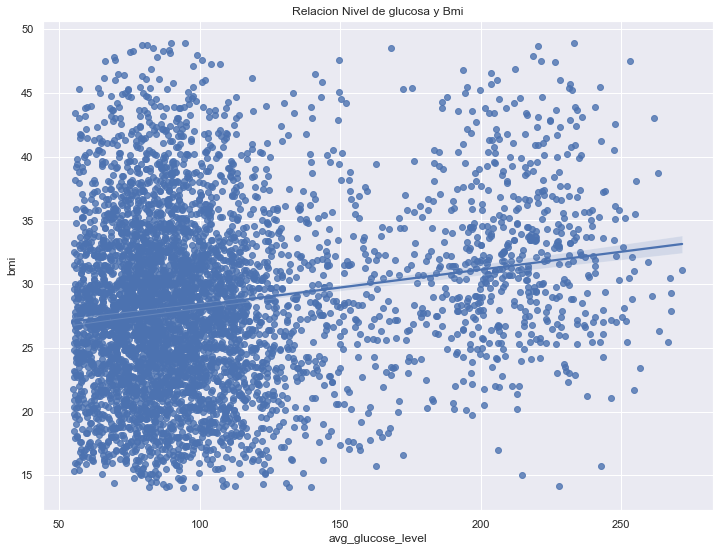

In [24]:
sns.regplot(x="avg_glucose_level", y="bmi",data=df)
plt.title('Relacion Nivel de glucosa y Bmi')

Vemos un grafico con una linea creciente indicando que a un nivel mas alto de glucosa mas bmi

# Target

In [25]:
# Remplazamos los valores de las columnas
df.gender = df.gender.replace({"Female": 1, "Male": 0})
df.ever_married	 = df.ever_married.replace({"Yes": 1, "No": 0})
df.Residence_type	 = df.Residence_type.replace({"Urban": 1, "Rural": 0})
df.work_type	 = df.work_type.replace({"Private": 3, "Self-employed": 2,"Govt_job": 1,"children": 0})
df.smoking_status	 = df.smoking_status.replace({"formerly smoked": 3, "smokes": 2,"never smoked": 1,"Unknown": 0})

In [26]:
target = 'stroke'                     #definir el target
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [27]:
print(df['stroke'].value_counts())    #Cantidad de strokes 1 en el df

0    4733
1     248
Name: stroke, dtype: int64


In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
rs = RandomOverSampler()
X, y = rs.fit_resample(X, y)

In [29]:
#conda install -c conda-forge imbalanced-learn

In [30]:
#!pip install imbalanced-learn

In [31]:
print(y['stroke'].value_counts())           #Strokes despues de nivelar

1    4733
0    4733
Name: stroke, dtype: int64


# Modelos

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

In [33]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((6626, 10), (2840, 10))

In [34]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [35]:
resultados=[]
training=[]

precision_test=[]
precision_train=[]

recall_test=[]
recall_train=[]

# Arboles de decision

In [36]:
tree = DecisionTreeClassifier(max_depth=6, random_state = 42)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [37]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test) 

In [38]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 0.8280216476247745
% de aciertos sobre el set de evaluación: 0.8084507042253521
% de precision sobre el set de entrenamiento: 0.7871052631578948
% de precision sobre el set de evaluacion: 0.7705416920267802
% de recall sobre el set de entrenamiento: 0.8992784125075165
% de recall sobre el set de evaluacion: 0.8834612700628053


In [39]:
resultados.append(test_accuracy)
training.append(train_accuracy)

precision_test.append(test_precision)
precision_train.append(train_precision)

recall_test.append(test_recall)
recall_train.append(train_recall)

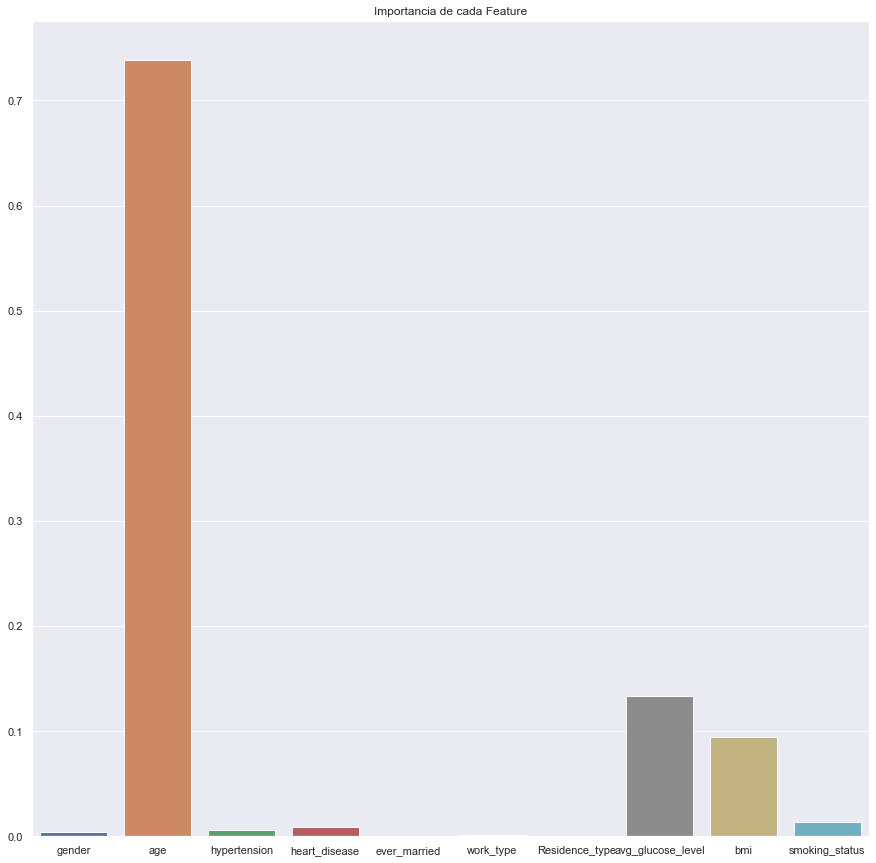

In [40]:
plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

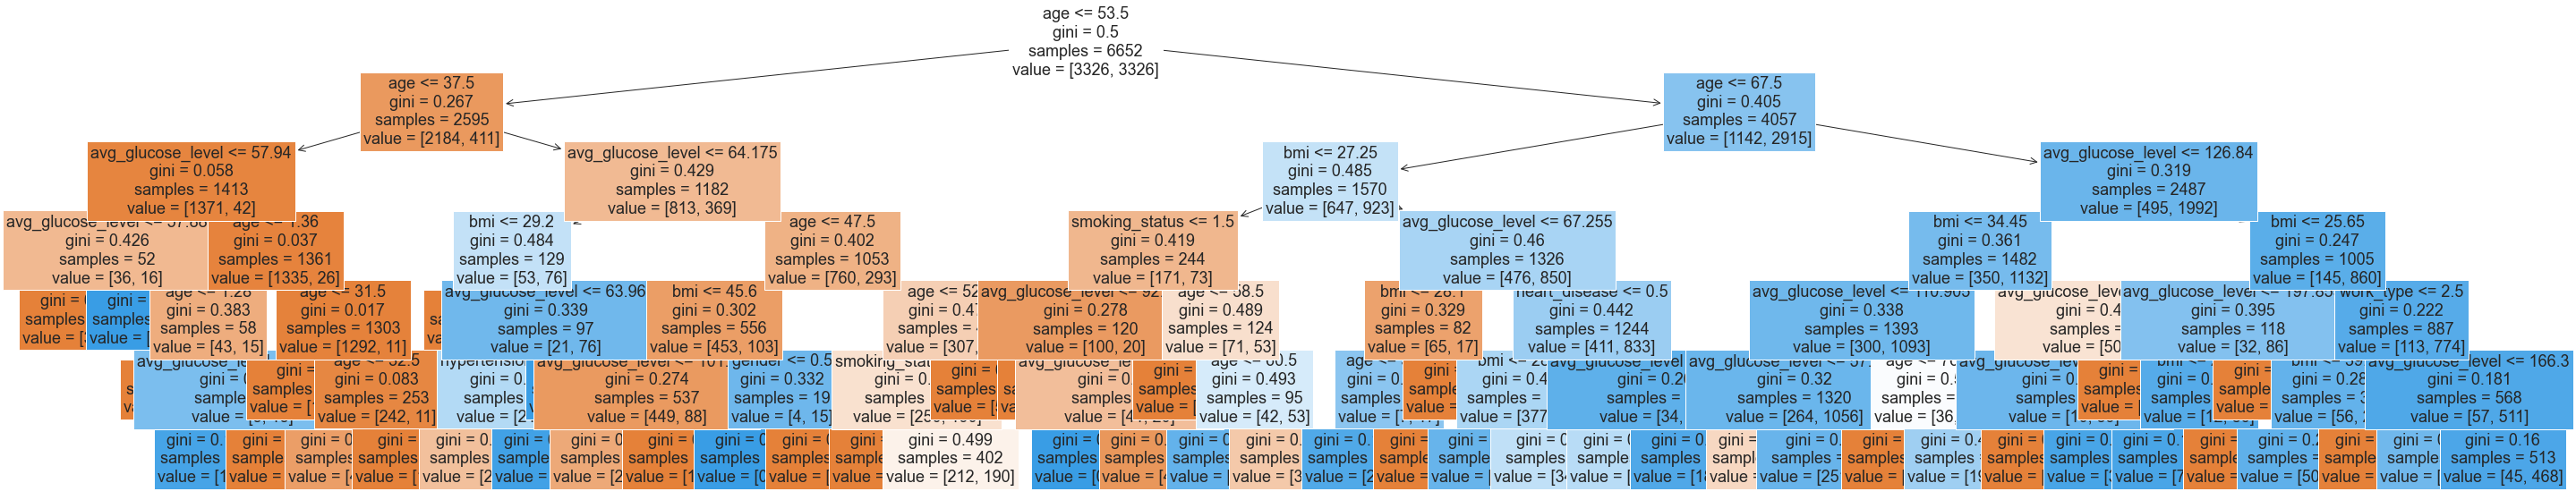

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
plot_tree(tree,filled=True,feature_names=X_train.columns, fontsize=18);

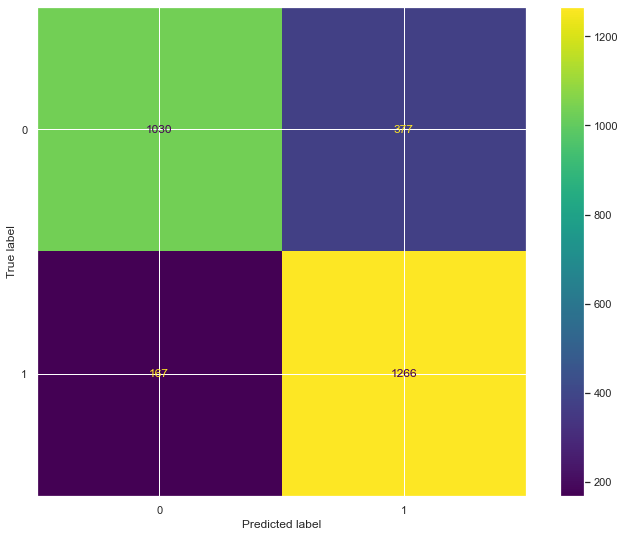

In [42]:
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [45]:
random_forest = RandomForestClassifier(random_state=1)

In [46]:
params = {
    'n_estimators' : [100, 200, 500],
    'max_features': [4,5,6,7,8],
    'max_depth' : [4,5,6,7,8]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'accuracy',
                                  cv=StratifiedKFold().split(X_train, y_train), 
                                  verbose = 1,
                                  n_jobs = -1)

In [47]:
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000002632E494C10>,
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [48]:
grid_random_forest.best_params_

{'max_depth': 8, 'max_features': 8, 'n_estimators': 100}

In [49]:
print(grid_random_forest.cv_results_["rank_test_score"])
print(grid_random_forest.cv_results_["mean_test_score"])
print(grid_random_forest.best_score_)

[125 128 132 133 130 131 129 133 138 136 140 141 137 135 139 142 143 147
 143 143 143 116 113 118 119 121 117 115 124 122 127 123 126 112 114 120
  98 101 109  99 101 110 108 111 103 106 100 105 107 104  97  93  91  96
  88  89  90  82  83  86  79  80  81  94  95  92  87  85  84  76  78  77
  71  70  72  64  66  67  62  61  63  58  60  59  75  74  73  65  67  69
  57  55  56  51  50  49  43  44  48  38  40  42  37  41  39  52  54  53
  46  47  45  36  33  35  30  28  29  23  27  24  18  20  19  17  21  16
  31  32  34  26  25  22  14  13  15  12  10  11   2   7   5   8   9   6
   1   4   3]
[0.77104715 0.76999441 0.7681908  0.76774012 0.7687923  0.76879219
 0.76894268 0.76774012 0.76728911 0.76758964 0.76698836 0.76698824
 0.76743926 0.76774001 0.767289   0.76683776 0.766537   0.76638663
 0.766537   0.766537   0.766537   0.77270129 0.77465482 0.77225016
 0.77209967 0.77179926 0.77225072 0.773302   0.77119696 0.77179824
 0.77059625 0.77149783 0.7710467  0.77510595 0.77360241 0.77194794


In [50]:
model = RandomForestClassifier(max_depth=6,random_state=42, max_features=6,n_estimators= 500)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=6, n_estimators=500,
                       random_state=42)

In [51]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test

In [52]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test

train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 0.8690619362597715
% de aciertos sobre el set de evaluación: 0.8595070422535211
% de precision sobre el set de entrenamiento: 0.8133775848863927
% de precision sobre el set de evaluacion: 0.8048349056603774
% de recall sobre el set de entrenamiento: 0.957907396271798
% de recall sobre el set de evaluacion: 0.9525471039776692


In [53]:
resultados.append(test_accuracy)
training.append(train_accuracy)

precision_test.append(test_precision)
precision_train.append(train_precision)

recall_test.append(test_recall)
recall_train.append(train_recall)

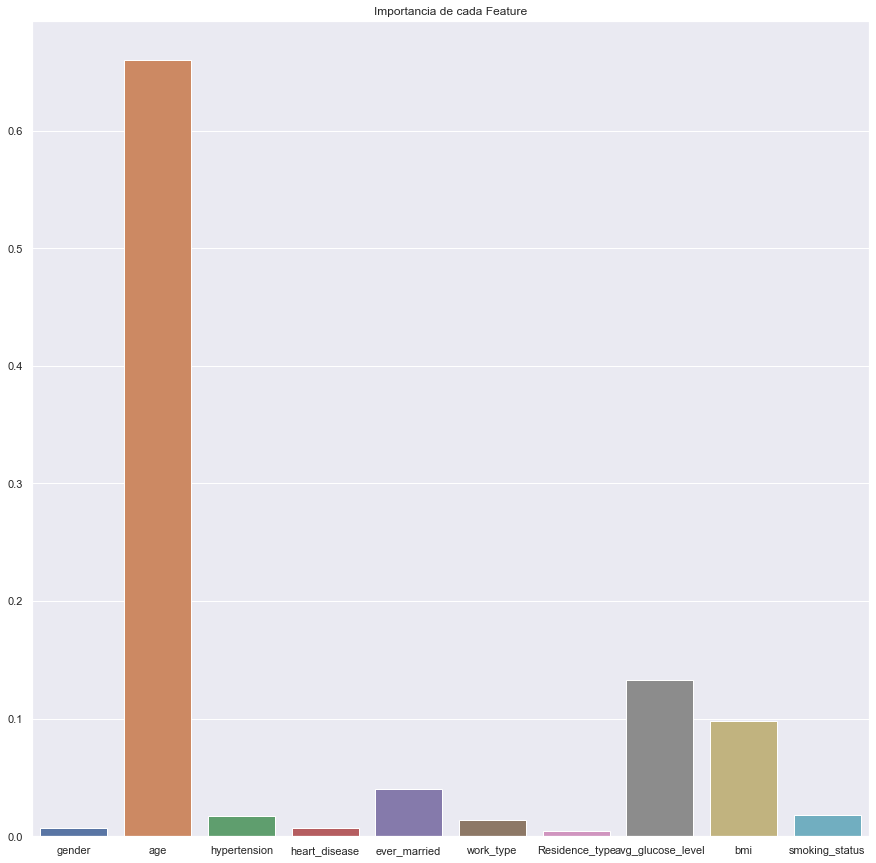

In [54]:
plt.figure(figsize=(15,15))
importances = model.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

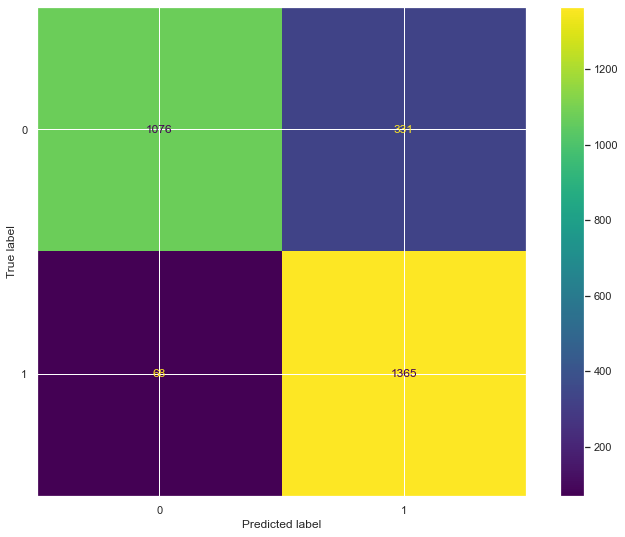

In [55]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Regresion logistica

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [57]:
regresion_logistica = LogisticRegression()
regresion_logistica.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_train_pred = regresion_logistica.predict(X_train) #Predicción en Train
y_test_pred = regresion_logistica.predict(X_test) #Predicción en Test

In [59]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test

train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 0.7563138905592303
% de aciertos sobre el set de evaluación: 0.7623239436619719
% de precision sobre el set de entrenamiento: 0.7447602641401091
% de precision sobre el set de evaluacion: 0.7536813922356091
% de recall sobre el set de entrenamiento: 0.7799158147925436
% de recall sobre el set de evaluacion: 0.7857641311933008


In [60]:
resultados.append(test_accuracy)
training.append(train_accuracy)

precision_test.append(test_precision)
precision_train.append(train_precision)

recall_test.append(test_recall)
recall_train.append(train_recall)

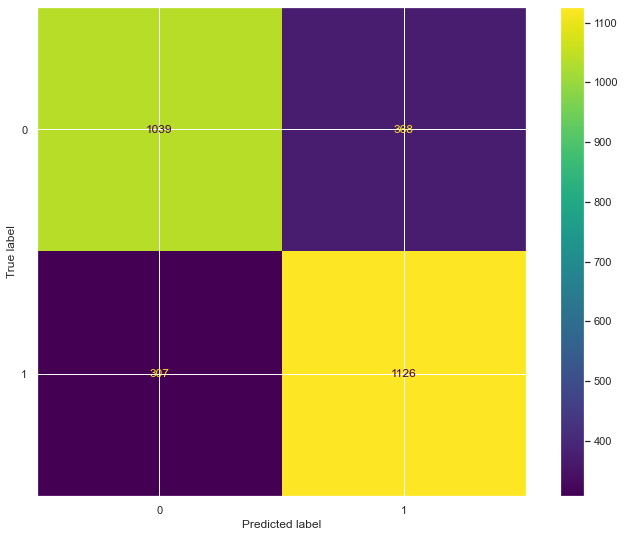

In [61]:
plot_confusion_matrix(regresion_logistica, X_test, y_test)  
plt.show()

# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [64]:
y_train_pred = knn.predict(X_train) #Predicción en Train
y_test_pred = knn.predict(X_test) #Predicción en Test

In [65]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test

train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 0.9682802164762477
% de aciertos sobre el set de evaluación: 0.9419014084507042
% de precision sobre el set de entrenamiento: 0.9403449250777495
% de precision sobre el set de evaluacion: 0.8967459324155194
% de recall sobre el set de entrenamiento: 1.0
% de recall sobre el set de evaluacion: 1.0


In [66]:
resultados.append(test_accuracy)
training.append(train_accuracy)

precision_test.append(test_precision)
precision_train.append(train_precision)

recall_test.append(test_recall)
recall_train.append(train_recall)

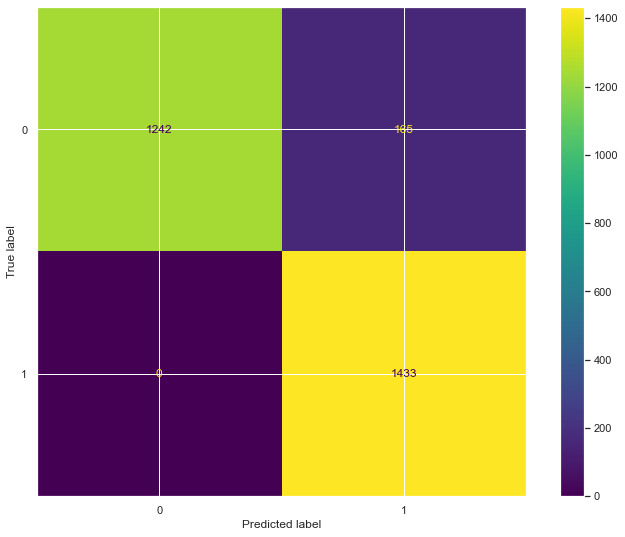

In [67]:
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

# SVM

In [68]:
from sklearn.svm import SVC

In [69]:
model = SVC(C=100)
model.fit(X_train,y_train)

SVC(C=100)

In [70]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test

In [71]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test

train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 0.7677390258568851
% de aciertos sobre el set de evaluación: 0.7746478873239436
% de precision sobre el set de entrenamiento: 0.7352708058124174
% de precision sobre el set de evaluacion: 0.7458152510849348
% de recall sobre el set de entrenamiento: 0.8367408298256164
% de recall sobre el set de evaluacion: 0.8394975575715282


In [72]:
resultados.append(test_accuracy)
training.append(train_accuracy)

precision_test.append(test_precision)
precision_train.append(train_precision)

recall_test.append(test_recall)
recall_train.append(train_recall)

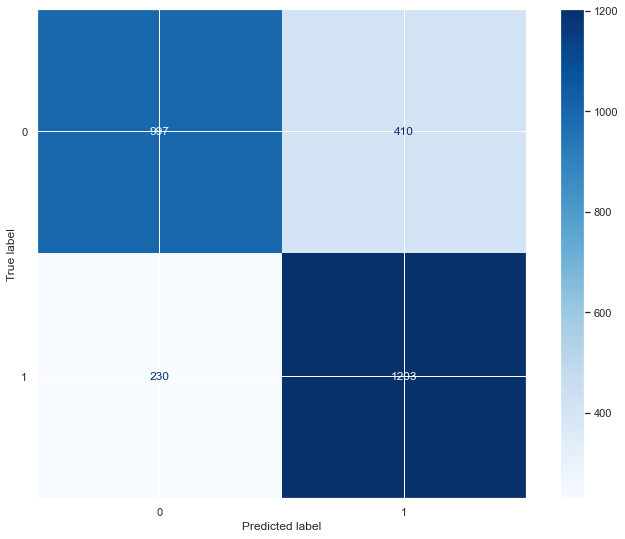

In [73]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues")  
plt.show()

# Conclusiones

In [74]:
resultados
df_resultados = pd.DataFrame(resultados,index=['tree','RF','LogReg','KNN','SVM'], columns=['Test'])
df_resultados['Training']=training
df_resultados['Precision_test']=precision_test
df_resultados['Precision_train']=precision_train
df_resultados['recall_test']=recall_test
df_resultados['recall_train']=recall_train
df_resultados

,Test,Training,Precision_test,Precision_train,recall_test,recall_train
tree,0.808451,0.828022,0.770542,0.787105,0.883461,0.899278
RF,0.859507,0.869062,0.804835,0.813378,0.952547,0.957907
LogReg,0.762324,0.756314,0.753681,0.744760,0.785764,0.779916
KNN,0.941901,0.968280,0.896746,0.940345,1.000000,1.000000
SVM,0.774648,0.767739,0.745815,0.735271,0.839498,0.836741


El modelo que mejor se comporta es random forest

Arboles de decision tambien funciona muy bien


Knn tiene un sobreajuste 

Regresion Logistica y SVM muestran menor rendimiento
